In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Defining ImageDataGenerator Object including augmentation and image pre-processing parameters

In [0]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale=1./255, # normalizing the RGB values
      validation_split=0.3)  #splitting the training data into train and validation

test_datagen = ImageDataGenerator(rescale=1./255)

Assigning the data path

In [0]:
train_dr = '/content/drive/My Drive/colab notebooks/Project - Image Classifier/data/train'
test_dr = '/content/drive/My Drive/colab notebooks/Project - Image Classifier/data/test'
predict_dr = '/content/drive/My Drive/colab notebooks/Project - Image Classifier/data/Predict'

Loading the data from directories, pre-processing the images and output lables and transforming the images to tensors

In [6]:

train_generator = train_datagen.flow_from_directory(
        train_dr,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        subset='training',
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        train_dr, # taking validation subset from training datas
        target_size=(150, 150),
        batch_size=batch_size,
        subset='validation',
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dr,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

predict_generator = test_datagen.flow_from_directory(
        predict_dr,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 9826 images belonging to 6 classes.
Found 4208 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7311 images belonging to 1 classes.


Defining a CNN model for multiclass classification 

In [0]:
#importing layers and Model
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, 150, 150)
else:
    input_shape = (150, 150, 3)
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(64, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.25)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(6, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)


Complilation of the model using adam optimizer and categorical crossentropy loss function

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

Training the model

In [9]:
history = model.fit(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=200,
        validation_data=validation_generator,
        validation_steps= 800 // batch_size)
model.save_weights('second_try.h5')

Epoch 1/200
125/125 [==============================] - 864s 7s/step - loss: 1.5491 - accuracy: 0.3440 - val_loss: 1.4027 - val_accuracy: 0.4450
Epoch 2/200
125/125 [==============================] - 691s 6s/step - loss: 1.2739 - accuracy: 0.4840 - val_loss: 1.2074 - val_accuracy: 0.5063
Epoch 3/200
125/125 [==============================] - 541s 4s/step - loss: 1.2160 - accuracy: 0.5205 - val_loss: 1.1663 - val_accuracy: 0.5450
Epoch 4/200
125/125 [==============================] - 443s 4s/step - loss: 1.1850 - accuracy: 0.5145 - val_loss: 1.1493 - val_accuracy: 0.5362
Epoch 5/200
125/125 [==============================] - 378s 3s/step - loss: 1.1545 - accuracy: 0.5340 - val_loss: 1.0605 - val_accuracy: 0.5750
Epoch 6/200
125/125 [==============================] - 306s 2s/step - loss: 1.1483 - accuracy: 0.5310 - val_loss: 1.1137 - val_accuracy: 0.5525
Epoch 7/200
125/125 [==============================] - 250s 2s/step - loss: 1.1361 - accuracy: 0.5468 - val_loss: 1.0067 - val_accuracy:

In [10]:
model.metrics_names

['loss', 'accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


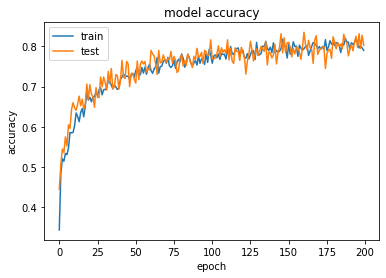

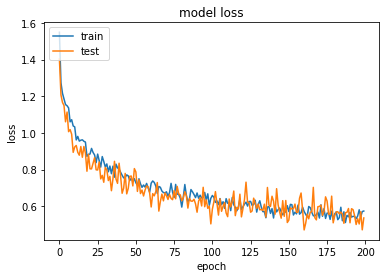

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.evaluate_generator(test_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


In [0]:
pred = model.predict_generator(predict_generator, verbose = 1)

In [0]:
predicted_class_indices = np.argmax(pred, axis = 1)

In [0]:
labels = (train_generator.class_indices)
labels = dict((v, k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
file_names = predict_generator.filenames
results = pd.DataFrame({"Filename": file_names, "Predictions": predictions})

In [0]:
results.to_csv('Predictions_1.csv', index=False)